In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris (1).xls to iris (1).xls


In [3]:
data = pd.read_excel('iris (1).xls')

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

In [8]:
# Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [52]:
data1 = data.drop(['PL'], axis=1)

In [53]:
#Filling null values
data1['SL'] = data1['SL'].fillna(data['SL'].mode()[0])
data1['SW'] = data1['SW'].fillna(data['SW'].median())

In [54]:
data1.isna().sum()

SL                0
SW                0
PW                0
Classification    0
dtype: int64

Logistic Regression

In [55]:
y = data['Classification']
x = data.drop('Classification', axis=1)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
model1 = log_reg.fit(x_train,y_train)
y_pred_logreg = model1.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(x_train, y_train)
        y_pred_knn = model2.predict(x_test)
        acc=accuracy_score(y_test,y_pred_knn)
        metric_k.append(acc)

In [61]:
print(metric_k)

[1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


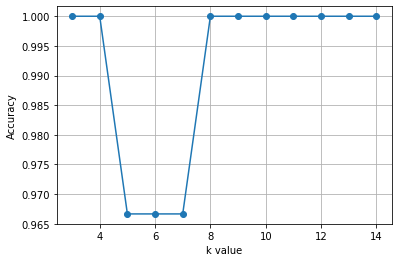

In [62]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
model2 = knn.fit(x_train, y_train)
y_pred_knn = model2.predict(x_test)

In [64]:
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
0.9666666666666667


SVM polynomial kernal


In [65]:
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='poly', degree = 4)
svm_model = svm_clf_p.fit(x_train, y_train)
y_pred_svmp = svm_clf_p.predict(x_test)


print(confusion_matrix(y_test, y_pred_svmp))
print(accuracy_score(y_test, y_pred_svmp))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
0.9666666666666667


SVM Linear Kernel

In [66]:
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(x_train, y_train)
y_pred_svml = svm_clf.predict(x_test)


print(confusion_matrix(y_test, y_pred_svml))
print(accuracy_score(y_test, y_pred_svml))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


SVM Radial Basis Function Kernel

In [67]:
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='rbf', degree = 4)
svm_model = svm_clf_p.fit(x_train, y_train)
y_pred_svmr = svm_clf_p.predict(x_test)


print(confusion_matrix(y_test, y_pred_svmr))
print(accuracy_score(y_test, y_pred_svmr))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(x_train, y_train)
y_pred_dtm = dtm_clf.predict(x_test)


print(confusion_matrix(y_test, y_pred_dtm))
print(accuracy_score(y_test, y_pred_dtm))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(x_train, y_train)
y_pred_rfm = rfm_clf.predict(x_test)


print(confusion_matrix(y_test, y_pred_rfm))
print(accuracy_score(y_test, y_pred_rfm))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
